**1 - ANÁLISE DE PEDIDOS**

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

%store -r dados

- Status dos Pedidos

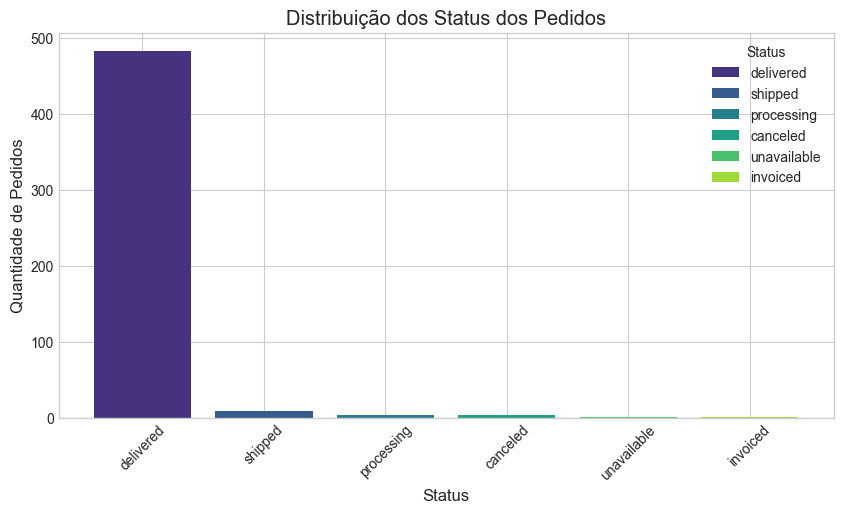

In [96]:
# Contagem de pedidos por status
status_counts = dados['order_status'].sample(500).value_counts()

plt.figure(figsize=(10, 5))
bars = plt.bar(status_counts.index, status_counts.values, color=sns.color_palette("viridis"))
plt.legend(bars, status_counts.index, title="Status")
plt.title("Distribuição dos Status dos Pedidos")
plt.xlabel("Status")
plt.ylabel("Quantidade de Pedidos")
plt.xticks(rotation=45)
plt.show()


__Insights:__

    A maioria dos pedidos está como "delivered", indicando boa eficiência na entrega.
    Poucos pedidos estão "canceled", o que pode indicar baixa taxa de cancelamento.

- Tempo de Entrega

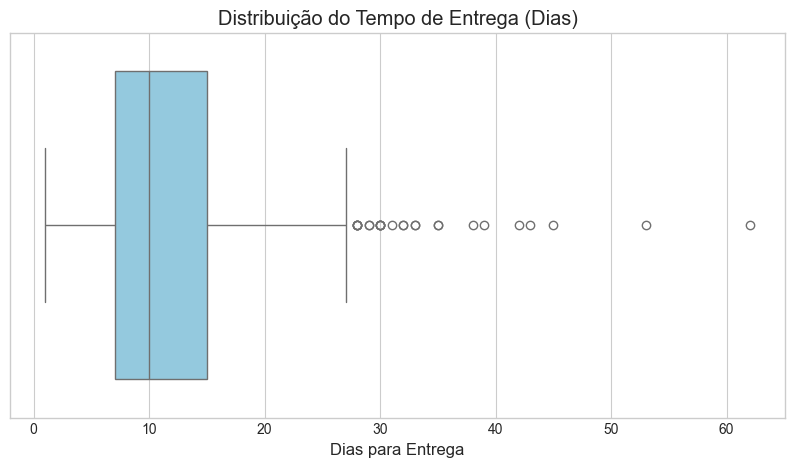

In [102]:
# Calculando o tempo de entrega (em dias)
dados['delivery_time'] = (dados['order_delivered_customer_date'] - dados['order_purchase_timestamp']).dt.days

# Boxplot do tempo de entrega
plt.figure(figsize=(10, 5))
sns.boxplot(x=dados['delivery_time'].sample(500), color='skyblue')
plt.title("Distribuição do Tempo de Entrega (Dias)")
plt.xlabel("Dias para Entrega")
plt.show()

__Insights:__

    A mediana do tempo de entrega está em torno de 10 dias.
    Há alguns outliers com entregas muito demoradas (acima de 27 dias).

- Atrasos na Entrega

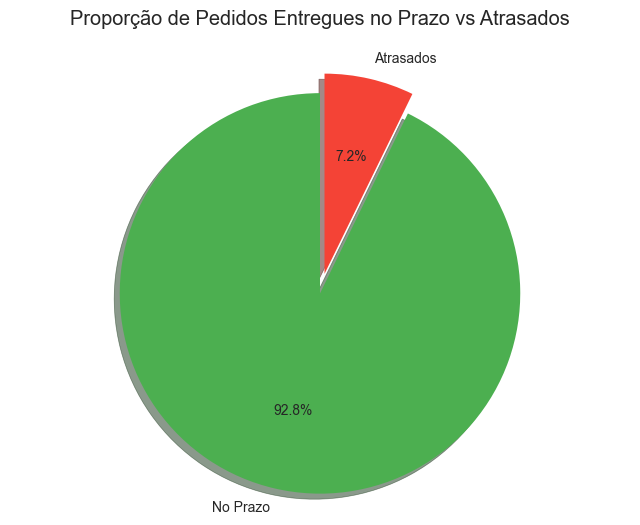

In [103]:
# Verificando se houve atraso
dados['estimated_delivery_days'] = (dados['order_estimated_delivery_date'] - dados['order_purchase_timestamp']).dt.days
dados['is_delayed'] = dados['delivery_time'] > dados['estimated_delivery_days']

# Porcentagem de atrasos
delay_percentage = dados['is_delayed'].mean() * 100

labels = ['No Prazo', 'Atrasados']
sizes = [100 - delay_percentage, delay_percentage]
colors = ['#4CAF50', '#F44336']
explode = (0, 0.1)  # Destaque para os atrasos

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Proporção de Pedidos Entregues no Prazo vs Atrasados', pad=20)
plt.axis('equal')
plt.show()

__Insights:__

    A taxa de atrasos de 7,2% está abaixo da média do mercado de e-commerce, que normalmente varia entre 5% a 15%, dependendo da região e categoria de produtos.
    Verificar se a taxa se mantém em períodos de pico.

**2 - ANÁLISE DE PRODUTOS**

- Relação entre Preço e Peso

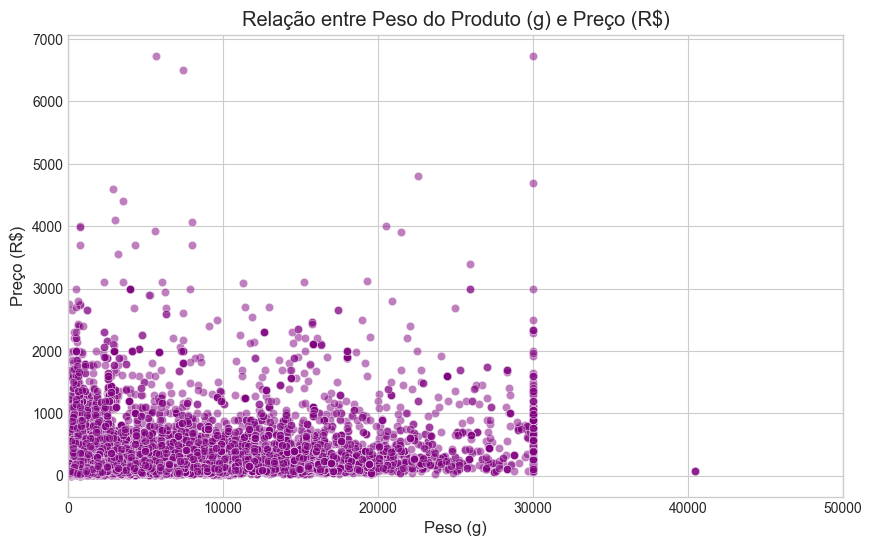

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='product_weight_g', y='price', data=dados, alpha=0.5, color='purple')
plt.title("Relação entre Peso do Produto (g) e Preço (R$)")
plt.xlabel("Peso (g)")
plt.ylabel("Preço (R$)")
plt.xlim(0, 50000)  # Limitando para melhor visualização
plt.show()

__Insights:__

    O peso sozinho não é um fator determinante para o preço dos produtos neste conjunto de dados.    

**3 - ANÁLISE DE CLIENTES**

- Distribuição Geográfica

C:\Users\igorq\AppData\Local\Temp\ipykernel_2716\1588526912.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette="rocket")


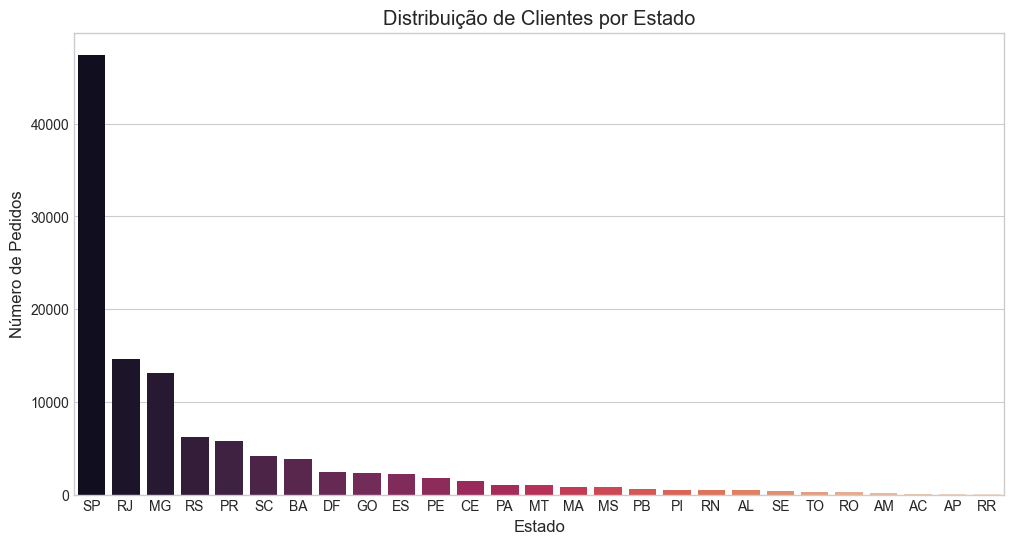

In [107]:
state_counts = dados['customer_state'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette="rocket")
plt.title("Distribuição de Clientes por Estado")
plt.xlabel("Estado")
plt.ylabel("Número de Pedidos")
plt.show()

__Insights:__

    SP (São Paulo) e RJ (Rio de Janeiro) são os estados com mais pedidos.
    

- Ticket Médio por Estado

C:\Users\igorq\AppData\Local\Temp\ipykernel_2716\530175068.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ticket.index, y=avg_ticket.values, palette="coolwarm")


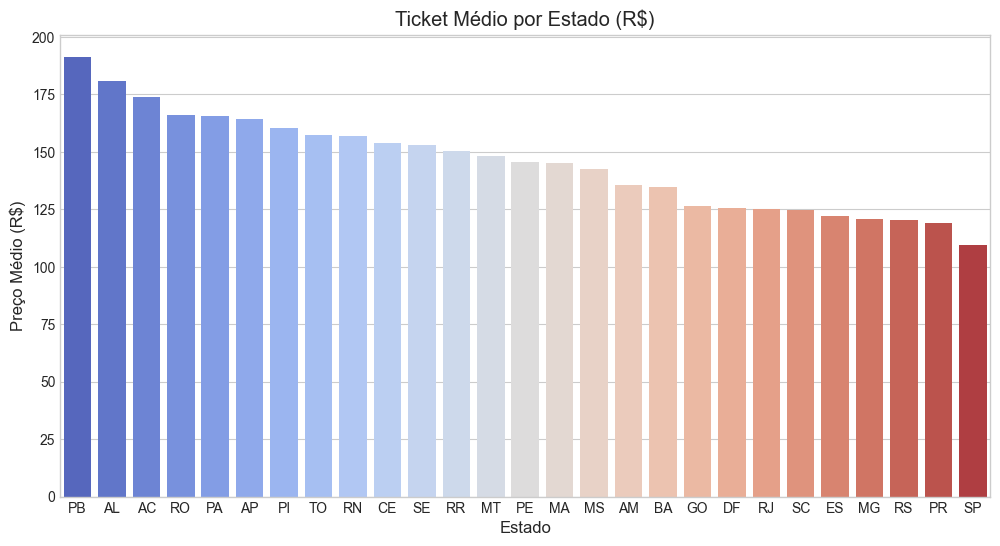

In [108]:
avg_ticket = dados.groupby('customer_state')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_ticket.index, y=avg_ticket.values, palette="coolwarm")
plt.title("Ticket Médio por Estado (R$)")
plt.xlabel("Estado")
plt.ylabel("Preço Médio (R$)")
plt.show()

__Insights:__

    Estados como PB e AL têm um ticket médio mais alto, indicando clientes que gastam mais por compra.
    Pode-se criar estratégias de upselling nesses mercados.

**4 - ANÁLISE DE VENDAS**

- Análise Sazonal

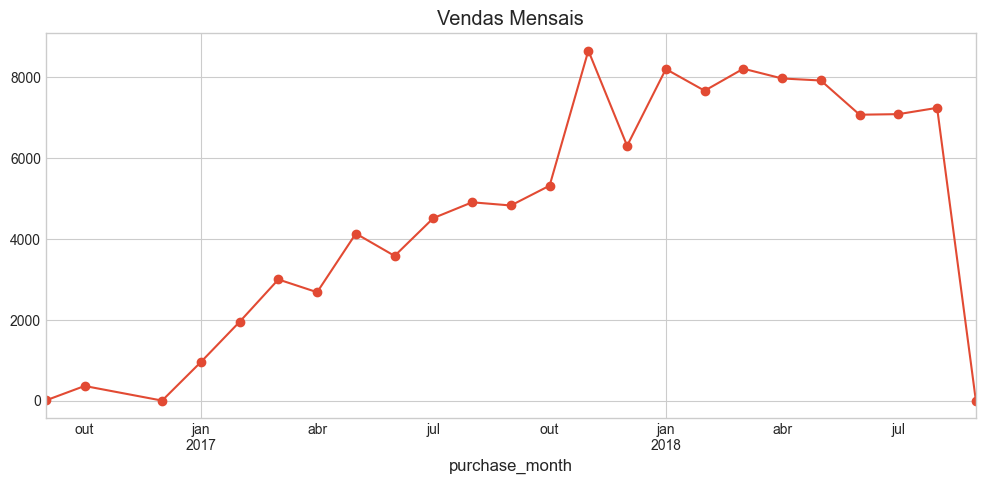

In [113]:
# Vendas por mês/estação
dados['purchase_month'] = dados['order_purchase_timestamp'].dt.to_period('M')
monthly_sales = dados.groupby('purchase_month').size()
monthly_sales.plot(figsize=(12, 5), marker='o')
plt.title('Vendas Mensais')
plt.grid(True)
plt.show()

- Vendas por Dia da Semana e Hora do Dia

C:\Users\igorq\AppData\Local\Temp\ipykernel_2716\1843114019.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_sales.index, y=daily_sales.values, palette='Blues_d')


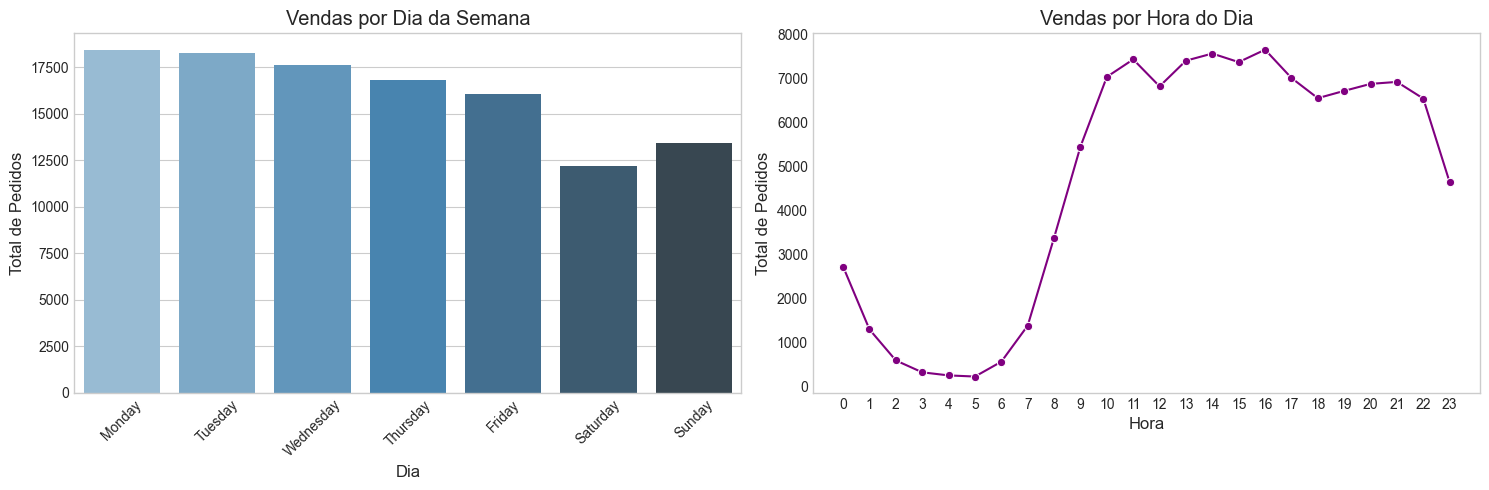

In [ ]:

#Colunas para dia da semana e hora
dados['purchase_day_of_week'] = dados['order_purchase_timestamp'].dt.day_name()
dados['purchase_hour'] = dados['order_purchase_timestamp'].dt.hour

#Vendas por dia da semana (ordem correta)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = dados['purchase_day_of_week'].value_counts().reindex(days_order)

#Vendas por hora do dia
hourly_sales = dados['purchase_hour'].value_counts().sort_index()


plt.figure(figsize=(15, 5))

# Gráfico 1: Vendas por dia da semana
plt.subplot(1, 2, 1)
sns.barplot(x=daily_sales.index, y=daily_sales.values, palette='Blues_d')
plt.title('Vendas por Dia da Semana')
plt.xlabel('Dia')
plt.ylabel('Total de Pedidos')
plt.xticks(rotation=45)

# Gráfico 2: Vendas por hora do dia
plt.subplot(1, 2, 2)
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o', color='purple')
plt.title('Vendas por Hora do Dia')
plt.xlabel('Hora')
plt.ylabel('Total de Pedidos')
plt.xticks(range(0, 24))
plt.grid()

plt.tight_layout()
plt.show()